In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch

from library import evals

CMAP_t10 = mpl.color_sequences['tab10']
CMAP_t20 = mpl.color_sequences['tab20']
CMAP_s1 = mpl.color_sequences['Set1']
CMAP_s2 = mpl.color_sequences['Set2']

ROOT = './results'

# Result: Large-scale

## Initialize

### Baseline model

In [14]:
sm_data_info = [
        {'info':["largescale_1", 'ResNet_50_neg_0', 'SoftMax']},
        {'info':["largescale_2", 'ResNet_50_neg_0', 'SoftMax']},
        {'info':["largescale_3", 'ResNet_50_neg_0', 'SoftMax']},
]

eos_data_info = [
        {'info':["largescale_1", 'ResNet_50_neg_All', 'EOS']},
        {'info':["largescale_2", 'ResNet_50_neg_All', 'EOS']},
        {'info':["largescale_3", 'ResNet_50_neg_All', 'EOS']},
]

### OvR model

In [15]:
ovr_data_info_tune = {
'C':[{'info':["largescale_2", 'ResNet_50_C_neg_0_b', 'OvR']},{'info':["largescale_2", 'ResNet_50_C_neg_0_g', 'OvR']}],
'F':[{'info':["largescale_2", 'ResNet_50_F_neg_0_1', 'OvR']},{'info':["largescale_2", 'ResNet_50_F_neg_0_2', 'OvR']},{'info':["largescale_2", 'ResNet_50_F_neg_0_3', 'OvR']}],
'H':[{'info':["largescale_2", 'ResNet_50_H_neg_0_02', 'OvR']},{'info':["largescale_2", 'ResNet_50_H_neg_0_06', 'OvR']}],
}

ovr_data_info_neg_tune = {
'C':[{'info':["largescale_2", 'ResNet_50_C_neg_All_b', 'OvR']},{'info':["largescale_2", 'ResNet_50_C_neg_All_g', 'OvR']}],
'F':[{'info':["largescale_2", 'ResNet_50_F_neg_All_1', 'OvR']},{'info':["largescale_2", 'ResNet_50_F_neg_All_2', 'OvR']},{'info':["largescale_2", 'ResNet_50_F_neg_All_3', 'OvR']}],
'H':[{'info':["largescale_2", 'ResNet_50_H_neg_All_02', 'OvR']},{'info':["largescale_2", 'ResNet_50_H_neg_All_06', 'OvR']}],
}

ovr_data_info = {
'base':[{'info':["largescale_1", 'ResNet_50_neg_0', 'OvR']},
        {'info':["largescale_2", 'ResNet_50_neg_0', 'OvR']},
        {'info':["largescale_3", 'ResNet_50_neg_0', 'OvR']},],
'C':[{'info':["largescale_1", 'ResNet_50_C_neg_0_g', 'OvR']},
     {'info':["largescale_2", 'ResNet_50_C_neg_0_g', 'OvR']},
     {'info':["largescale_3", 'ResNet_50_C_neg_0_g', 'OvR']},],
'F':[{'info':["largescale_1", 'ResNet_50_F_neg_0_1', 'OvR']},
     {'info':["largescale_2", 'ResNet_50_F_neg_0_1', 'OvR']},
     {'info':["largescale_3", 'ResNet_50_F_neg_0_1', 'OvR']},],
'H':[{'info':["largescale_1", 'ResNet_50_H_neg_0_02', 'OvR']},
     {'info':["largescale_2", 'ResNet_50_H_neg_0_02', 'OvR']},
     {'info':["largescale_3", 'ResNet_50_H_neg_0_02', 'OvR']},],
}

ovr_data_info_neg = {
'base':[{'info':["largescale_1", 'ResNet_50_neg_All', 'OvR']},
        {'info':["largescale_2", 'ResNet_50_neg_All', 'OvR']},
        {'info':["largescale_3", 'ResNet_50_neg_All', 'OvR']},],
'C':[{'info':["largescale_1", 'ResNet_50_C_neg_All_b', 'OvR']},
     {'info':["largescale_2", 'ResNet_50_C_neg_All_b', 'OvR']},
     {'info':["largescale_3", 'ResNet_50_C_neg_All_b', 'OvR']},],
'F':[{'info':["largescale_1", 'ResNet_50_F_neg_All_3', 'OvR']},
     {'info':["largescale_2", 'ResNet_50_F_neg_All_3', 'OvR']},
     {'info':["largescale_3", 'ResNet_50_F_neg_All_3', 'OvR']},],
'H':[{'info':["largescale_1", 'ResNet_50_H_neg_All_02', 'OvR']},
     {'info':["largescale_2", 'ResNet_50_H_neg_All_02', 'OvR']},
     {'info':["largescale_3", 'ResNet_50_H_neg_All_02', 'OvR']},],
}

## Hyperparameter Tuning

### Loss weighting parameter: Neg = 0
- Best C OvR : global 
- Best F OvR : 1
- Best M OvR : 0.2

In [16]:
data_info = ovr_data_info_tune['C']
results = evals.print_metrics(data_info, results_root=ROOT, show_osa_v=True)

maxOSA_V↑	maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓
0.5706	0.5770	0.6993	1.1600	0.9986	1.5583	1.8680
0.5954	0.6007	0.7066	1.3200	0.7586	1.2402	1.4962


In [17]:
data_info = ovr_data_info_tune['F']
results = evals.print_metrics(data_info, results_root=ROOT, show_osa_v=True)

maxOSA_V↑	maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓


0.6319	0.6377	0.7362	3.7000	0.0772	0.2189	0.1915
0.6204	0.6213	0.7311	3.7933	0.0789	0.2217	0.1902
0.6256	0.6226	0.7308	4.0400	0.0864	0.2101	0.1870


In [18]:
data_info = ovr_data_info_tune['H']
results = evals.print_metrics(data_info, results_root=ROOT, show_osa_v=True)

maxOSA_V↑	maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓
0.5930	0.6020	0.7033	2.6133	0.3140	0.6323	0.6160
0.5485	0.5577	0.6776	1.6533	1.1253	1.5637	1.6716


### Loss weighting parameter - neg All
- Best C OvR : batch 
- Best F OvR : 3
- Best M OvR : 0.2

In [19]:
data_info = ovr_data_info_neg_tune['C']
results = evals.print_metrics(data_info, results_root=ROOT, show_osa_v=True)

maxOSA_V↑	maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓


0.7109	0.7056	0.7231	2.4067	0.2761	0.1822	0.4539
0.7105	0.7170	0.7325	2.1000	0.3386	0.2022	0.5634


In [20]:
data_info = ovr_data_info_neg_tune['F']
results = evals.print_metrics(data_info, results_root=ROOT, show_osa_v=True)

maxOSA_V↑	maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓


0.7093	0.7167	0.7299	4.8467	0.0517	0.0275	0.0805
0.7034	0.7125	0.7304	5.0133	0.0503	0.0290	0.0670
0.7153	0.7256	0.7395	5.0800	0.0490	0.0200	0.0615


In [21]:
data_info = ovr_data_info_neg_tune['H']
results = evals.print_metrics(data_info, results_root=ROOT, show_osa_v=True)

maxOSA_V↑	maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓
0.7327	0.7367	0.7468	3.1200	0.1264	0.0815	0.2200
0.7289	0.7252	0.7461	2.6200	0.2152	0.1475	0.3642


## Metrics Plots

### Protocol 1

FPR_K
FPR_U
FPR_N
FNR
OSA_N
OSA_U


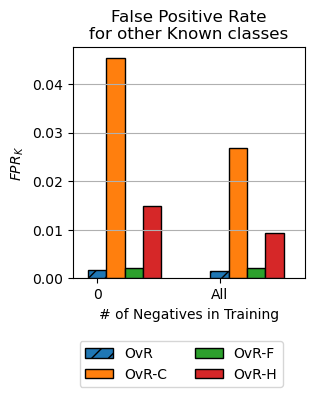

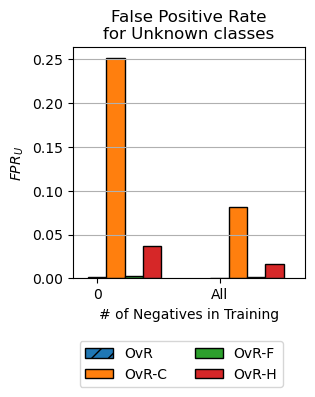

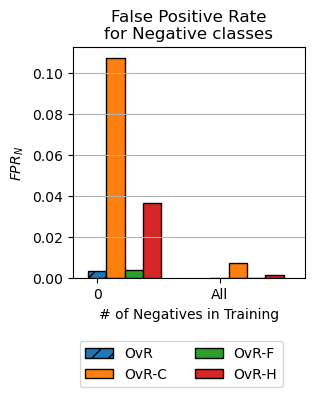

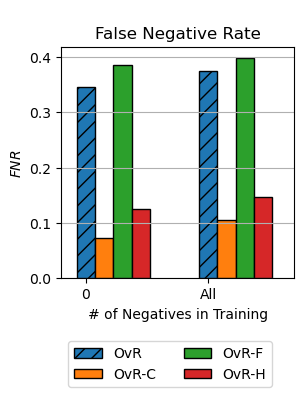

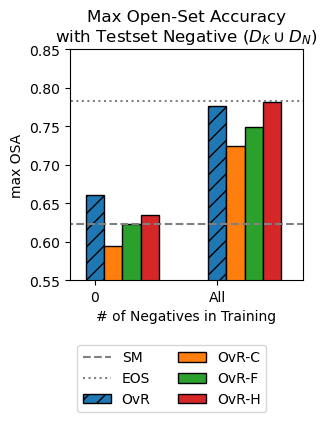

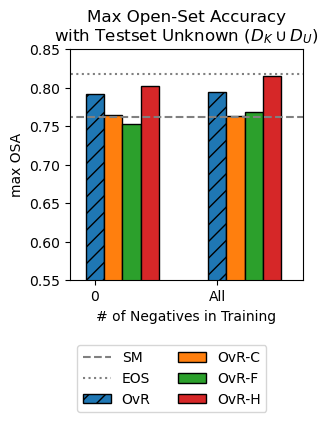

In [22]:
data_info_base = [sm_data_info[0],eos_data_info[0]]
data_info_ovr = [
    [ovr_data_info['base'][0], ovr_data_info_neg['base'][0]],
    [ovr_data_info['C'][0], ovr_data_info_neg['C'][0]],
    [ovr_data_info['F'][0], ovr_data_info_neg['F'][0]],
    [ovr_data_info['H'][0], ovr_data_info_neg['H'][0]],
]
labels = ['OvR','OvR-C','OvR-F','OvR-H']

evals.plot_metrics_l(data_info_base, data_info_ovr, labels, results_root=ROOT, ylim=(None,None,(0.55, 0.85)))

### Protocol 2

FPR_K


FPR_U
FPR_N
FNR
OSA_N
OSA_U


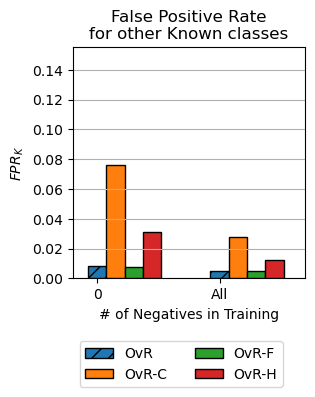

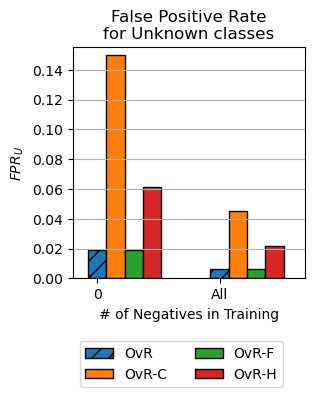

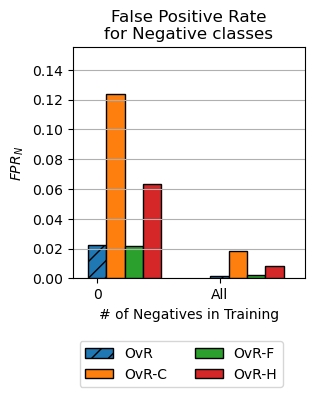

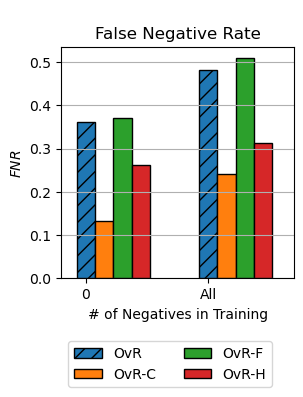

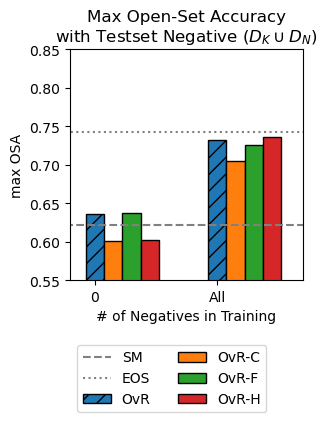

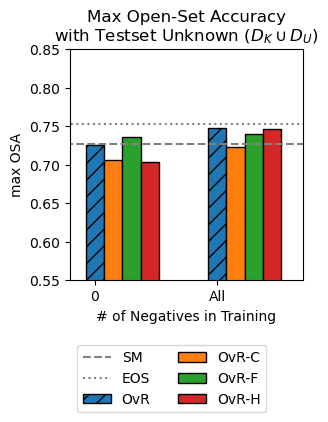

In [23]:
data_info_base = [sm_data_info[1],eos_data_info[1]]
data_info_ovr = [
    [ovr_data_info['base'][1], ovr_data_info_neg['base'][1]],
    [ovr_data_info['C'][1], ovr_data_info_neg['C'][1]],
    [ovr_data_info['F'][1], ovr_data_info_neg['F'][1]],
    [ovr_data_info['H'][1], ovr_data_info_neg['H'][1]],
]
labels = ['OvR','OvR-C','OvR-F','OvR-H']

evals.plot_metrics_l(data_info_base, data_info_ovr, labels, results_root=ROOT, ylim=(None,(0,0.155),(0.55, 0.85)))

### Protocol 3

FPR_K
FPR_U
FPR_N
FNR
OSA_N
OSA_U


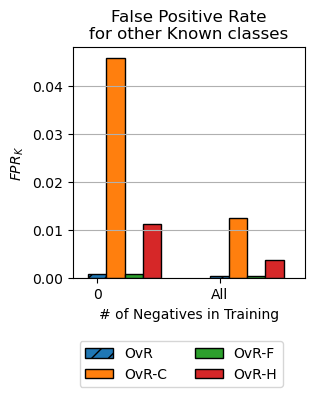

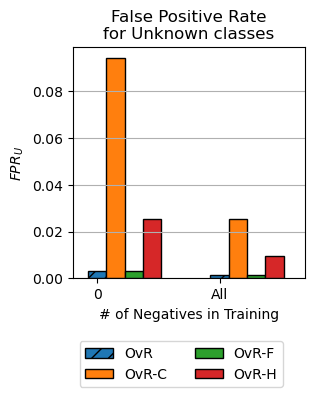

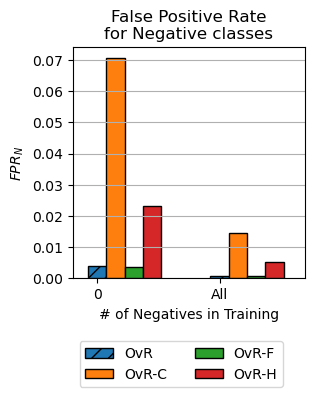

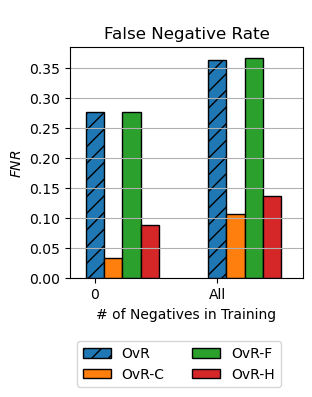

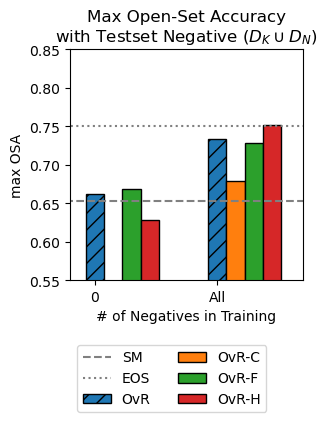

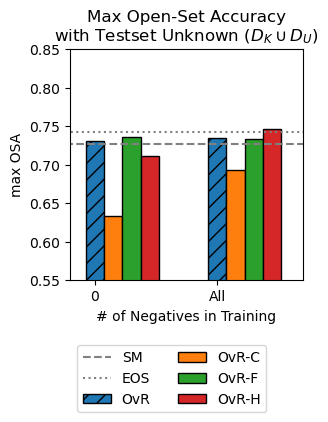

In [24]:
data_info_base = [sm_data_info[2],eos_data_info[2]]
data_info_ovr = [
    [ovr_data_info['base'][2], ovr_data_info_neg['base'][2]],
    [ovr_data_info['C'][2], ovr_data_info_neg['C'][2]],
    [ovr_data_info['F'][2], ovr_data_info_neg['F'][2]],
    [ovr_data_info['H'][2], ovr_data_info_neg['H'][2]],
]
labels = ['OvR','OvR-C','OvR-F','OvR-H']

evals.plot_metrics_l(data_info_base, data_info_ovr, labels, results_root=ROOT, ylim=(None,None,(0.55, 0.85)))

## OSA Plots

#### Protocol 1

In [25]:
data_info = [sm_data_info[0],
             ovr_data_info['base'][0],
             ovr_data_info['C'][0], ovr_data_info['F'][0], ovr_data_info['H'][0]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['largescale_1', 'ResNet_50_neg_0', 'SoftMax']
['largescale_1', 'ResNet_50_neg_0', 'OvR']
['largescale_1', 'ResNet_50_C_neg_0_g', 'OvR']
['largescale_1', 'ResNet_50_F_neg_0_1', 'OvR']
['largescale_1', 'ResNet_50_H_neg_0_02', 'OvR']


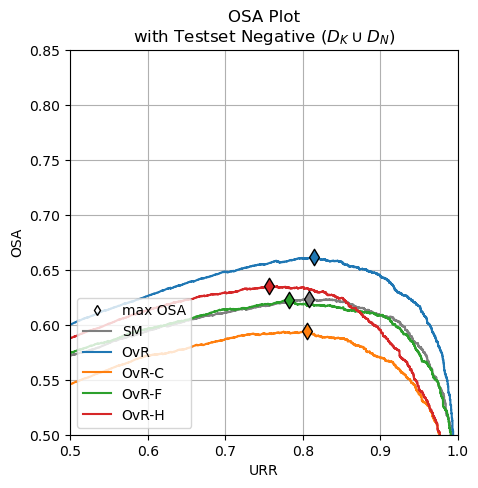

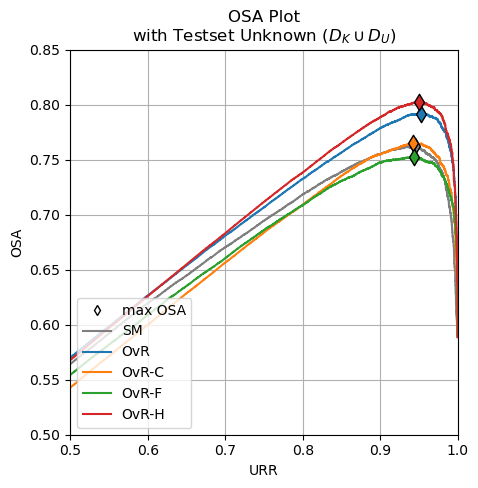

In [27]:
labels = ['SM', 'OvR', 'OvR-C', 'OvR-F', 'OvR-H']
colors = [CMAP_t10[-3]] + CMAP_t10[0:len(data_info)-1]
evals.plot_OSA(data_info, colors, results_root=ROOT, labels = labels, figsize = (5,5), lim=((0.5,1),(0.5,0.85)),
               show_point=(False, True))

In [28]:
data_info = [eos_data_info[0],
             ovr_data_info_neg['base'][0],
             ovr_data_info_neg['C'][0], ovr_data_info_neg['F'][0], ovr_data_info_neg['H'][0]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['largescale_1', 'ResNet_50_neg_All', 'EOS']
['largescale_1', 'ResNet_50_neg_All', 'OvR']
['largescale_1', 'ResNet_50_C_neg_All_b', 'OvR']
['largescale_1', 'ResNet_50_F_neg_All_3', 'OvR']
['largescale_1', 'ResNet_50_H_neg_All_02', 'OvR']


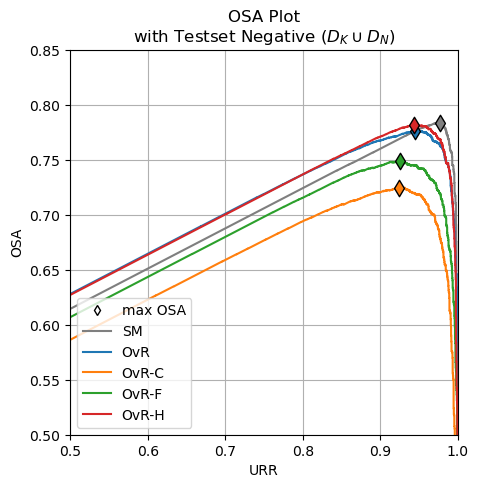

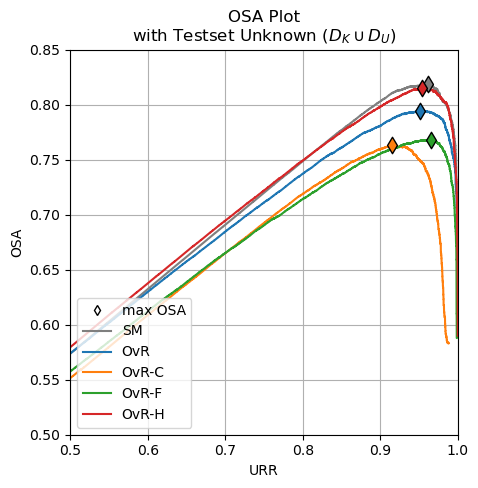

In [29]:
labels = ['SM', 'OvR', 'OvR-C', 'OvR-F', 'OvR-H']
colors = [CMAP_t10[-3]] + CMAP_t10[0:len(data_info)-1]
evals.plot_OSA(data_info, colors, results_root=ROOT, labels = labels, figsize = (5,5), lim=((0.5,1),(0.5,0.85)),
               show_point=(False, True))

#### Protocol 2

In [30]:
data_info = [sm_data_info[1],
             ovr_data_info['base'][1],
             ovr_data_info['C'][1], ovr_data_info['F'][1], ovr_data_info['H'][1]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['largescale_2', 'ResNet_50_neg_0', 'SoftMax']
['largescale_2', 'ResNet_50_neg_0', 'OvR']
['largescale_2', 'ResNet_50_C_neg_0_g', 'OvR']
['largescale_2', 'ResNet_50_F_neg_0_1', 'OvR']
['largescale_2', 'ResNet_50_H_neg_0_02', 'OvR']


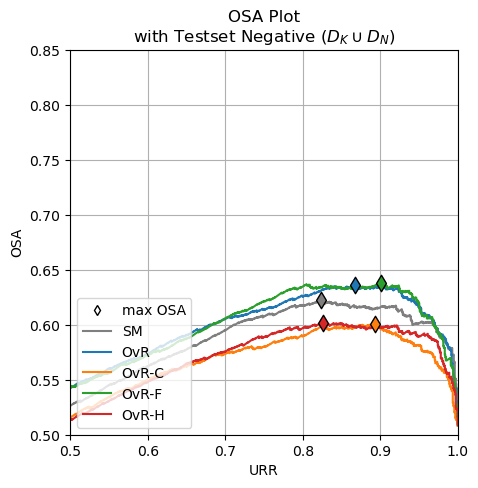

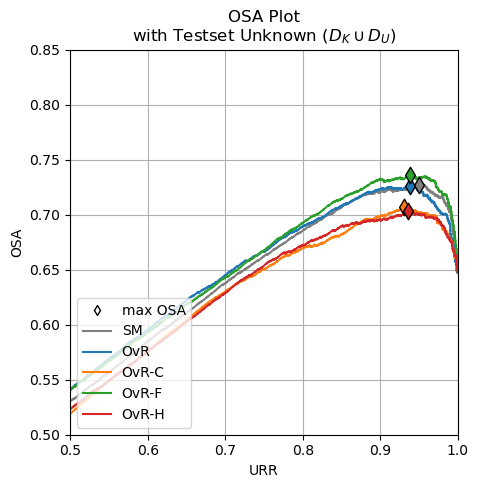

In [31]:
labels = ['SM', 'OvR', 'OvR-C', 'OvR-F', 'OvR-H']
colors = [CMAP_t10[-3]] + CMAP_t10[0:len(data_info)-1]
evals.plot_OSA(data_info, colors, results_root=ROOT, labels = labels, figsize = (5,5), lim=((0.5,1),(0.5,0.85)),
               show_point=(False, True))

In [32]:
data_info = [eos_data_info[1],
             ovr_data_info_neg['base'][1],
             ovr_data_info_neg['C'][1], ovr_data_info_neg['F'][1], ovr_data_info_neg['H'][1]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['largescale_2', 'ResNet_50_neg_All', 'EOS']
['largescale_2', 'ResNet_50_neg_All', 'OvR']
['largescale_2', 'ResNet_50_C_neg_All_b', 'OvR']
['largescale_2', 'ResNet_50_F_neg_All_3', 'OvR']
['largescale_2', 'ResNet_50_H_neg_All_02', 'OvR']


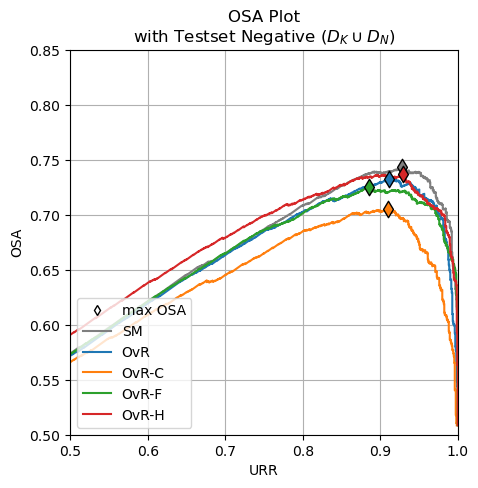

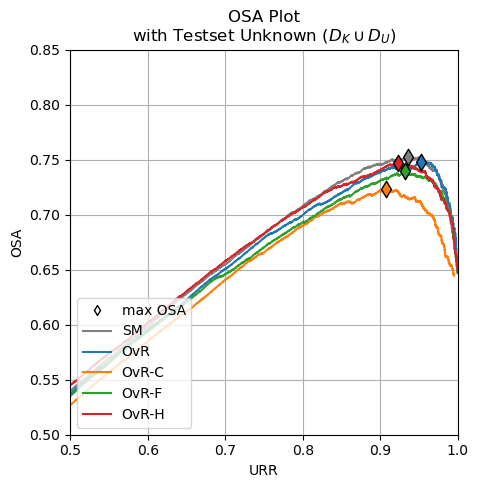

In [33]:
labels = ['SM', 'OvR', 'OvR-C', 'OvR-F', 'OvR-H']
colors = [CMAP_t10[-3]] + CMAP_t10[0:len(data_info)-1]
evals.plot_OSA(data_info, colors, results_root=ROOT, labels = labels, figsize = (5,5), lim=((0.5,1),(0.5,0.85)),
               show_point=(False, True))

#### Protocol 3

In [34]:
data_info = [sm_data_info[2],
             ovr_data_info['base'][2],
             ovr_data_info['C'][2], ovr_data_info['F'][2], ovr_data_info['H'][2]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['largescale_3', 'ResNet_50_neg_0', 'SoftMax']
['largescale_3', 'ResNet_50_neg_0', 'OvR']
['largescale_3', 'ResNet_50_C_neg_0_g', 'OvR']
['largescale_3', 'ResNet_50_F_neg_0_1', 'OvR']
['largescale_3', 'ResNet_50_H_neg_0_02', 'OvR']


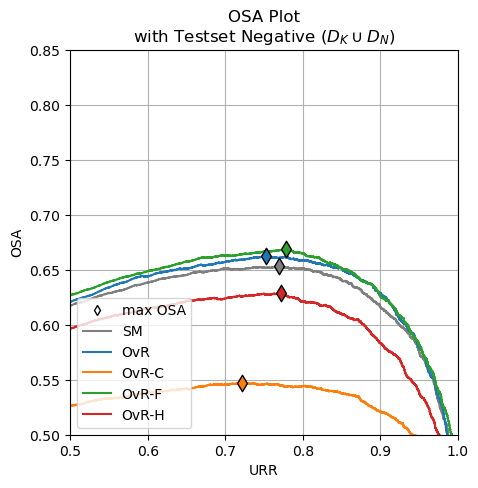

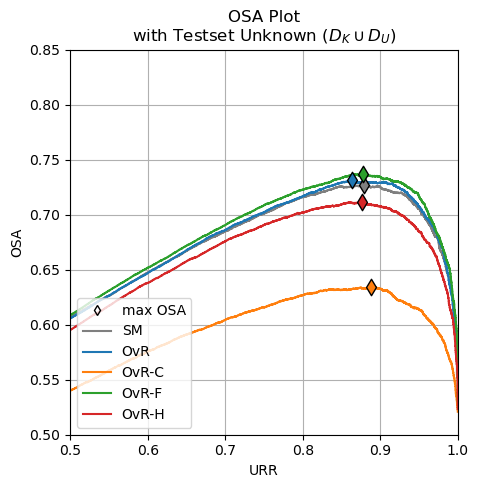

In [35]:
labels = ['SM', 'OvR', 'OvR-C', 'OvR-F', 'OvR-H']
colors = [CMAP_t10[-3]] + CMAP_t10[0:len(data_info)-1]
evals.plot_OSA(data_info, colors, results_root=ROOT, labels = labels, figsize = (5,5), lim=((0.5,1),(0.5,0.85)),
               show_point=(False, True))

In [36]:
data_info = [eos_data_info[2],
             ovr_data_info_neg['base'][2],
             ovr_data_info_neg['C'][2], ovr_data_info_neg['F'][2], ovr_data_info_neg['H'][2]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['largescale_3', 'ResNet_50_neg_All', 'EOS']
['largescale_3', 'ResNet_50_neg_All', 'OvR']
['largescale_3', 'ResNet_50_C_neg_All_b', 'OvR']
['largescale_3', 'ResNet_50_F_neg_All_3', 'OvR']
['largescale_3', 'ResNet_50_H_neg_All_02', 'OvR']


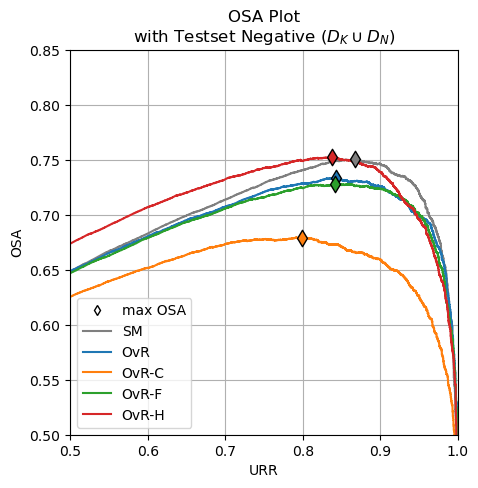

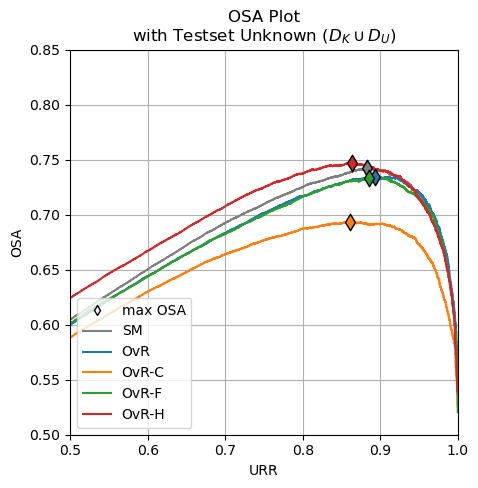

In [37]:
labels = ['SM', 'OvR', 'OvR-C', 'OvR-F', 'OvR-H']
colors = [CMAP_t10[-3]] + CMAP_t10[0:len(data_info)-1]
evals.plot_OSA(data_info, colors, results_root=ROOT, labels = labels, figsize = (5,5), lim=((0.5,1),(0.5,0.85)),
               show_point=(False, True))

## Score Distribution

### Protocol 1

In [38]:
data_info = [sm_data_info[0],
             ovr_data_info['base'][0],
             ovr_data_info['C'][0], ovr_data_info['F'][0], ovr_data_info['H'][0]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['largescale_1', 'ResNet_50_neg_0', 'SoftMax']
['largescale_1', 'ResNet_50_neg_0', 'OvR']
['largescale_1', 'ResNet_50_C_neg_0_g', 'OvR']
['largescale_1', 'ResNet_50_F_neg_0_1', 'OvR']
['largescale_1', 'ResNet_50_H_neg_0_02', 'OvR']


[22.36206897  2.94827586  2.          1.89655172] [52.75862069  3.03448276  2.75862069  1.67241379]
[22.72413793  2.72413793  1.98275862  1.44827586] [57.39655172  6.03448276  4.29310345  2.51724138]
[2.05172414 0.70689655 0.48275862 0.53448276] [0.84482759 0.5862069  0.29310345 0.39655172]
[12.51724138  5.03448276  3.79310345  2.89655172] [22.5862069  11.15517241  8.65517241  7.25862069]
[5.0862069  1.60344828 0.87931034 0.96551724] [8.87931034 3.01724138 1.84482759 1.48275862]


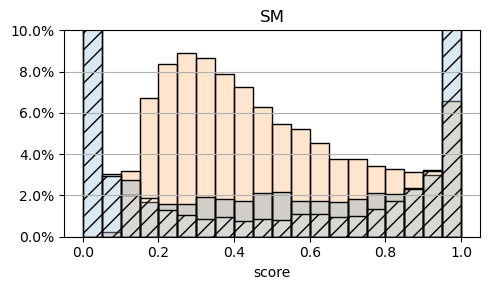

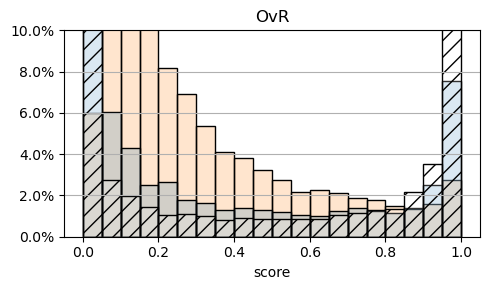

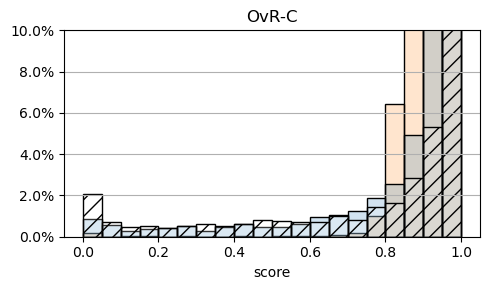

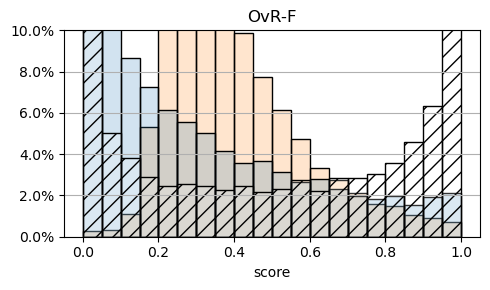

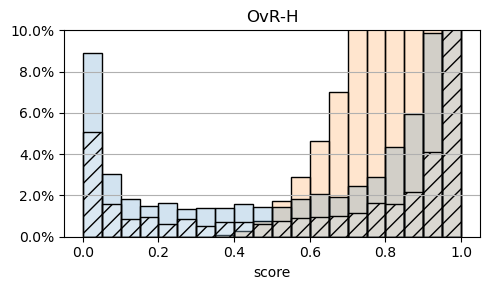

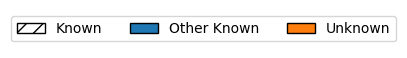

In [39]:
start, stop, step = 0, 1, 0.05
colors=('white',CMAP_t10[0],CMAP_t10[2],CMAP_t10[1])
alpha = [0.2]*len(colors)
bins = np.arange(start=start,stop=stop+step, step=step)
title = ['SM','OvR','OvR-C','OvR-F','OvR-H']
legend = evals.plot_score_dist(data_info, bins, colors=list(zip(colors,alpha)), results_root=ROOT, title = title,
                               figsize=(5,3), ylim=(0,10), plot_neg=False)

# Composing separate legend plot
labels = ['Known', 'Other Known', 'Negative', 'Unknown']
legend_elements = [Patch(facecolor=colors[0], label=labels[0], edgecolor='black', hatch='//'),
                  Patch(facecolor=colors[1], label=labels[1], edgecolor='black'),
                #   Patch(facecolor=colors[2], label=labels[2], edgecolor='black'),
                  Patch(facecolor=colors[3], label=labels[3], edgecolor='black'),]
# Create the figure
fig, ax = plt.subplots(figsize=(5,0.5))
ax.legend(handles=legend_elements, loc='center', ncol=4)
ax.axes.axis("off")
plt.show()

In [40]:
data_info = [eos_data_info[0],
             ovr_data_info_neg['base'][0],
             ovr_data_info_neg['C'][0], ovr_data_info_neg['F'][0], ovr_data_info_neg['H'][0]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['largescale_1', 'ResNet_50_neg_All', 'EOS']
['largescale_1', 'ResNet_50_neg_All', 'OvR']
['largescale_1', 'ResNet_50_C_neg_All_b', 'OvR']
['largescale_1', 'ResNet_50_F_neg_All_3', 'OvR']
['largescale_1', 'ResNet_50_H_neg_All_02', 'OvR']


[21.55172414  2.94827586  1.62068966  1.5       ] [54.32758621  4.17241379  3.06896552  2.44827586]
[25.94827586  2.9137931   1.5         1.4137931 ] [64.75862069  5.48275862  3.34482759  2.27586207]


[4.87931034 1.0862069  0.72413793 0.68965517] [3.89655172 1.34482759 0.94827586 0.94827586]
[4.01724138 3.9137931  4.0862069  3.75862069] [4.62068966 6.72413793 7.29310345 9.43103448]
[8.43103448 1.15517241 0.77586207 0.77586207] [20.01724138  4.03448276  2.5         2.06896552]


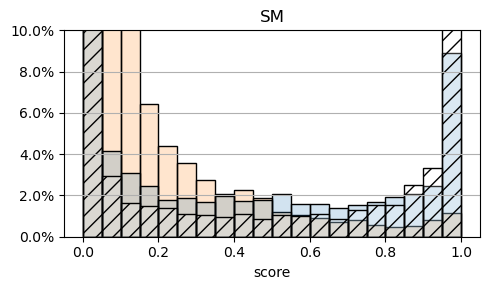

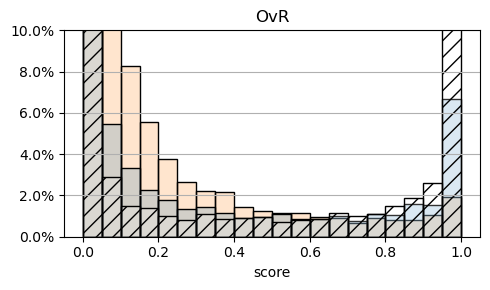

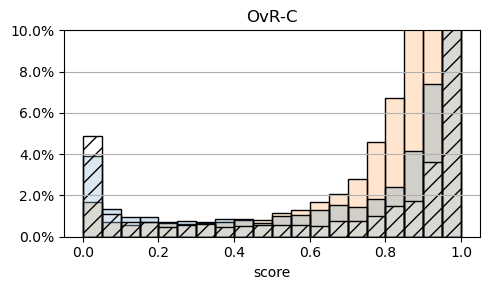

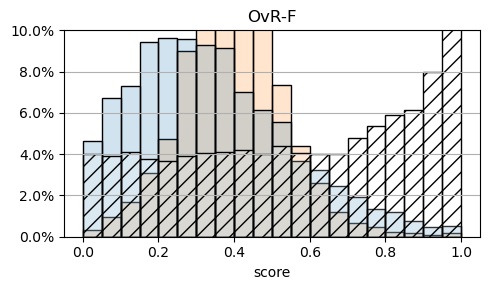

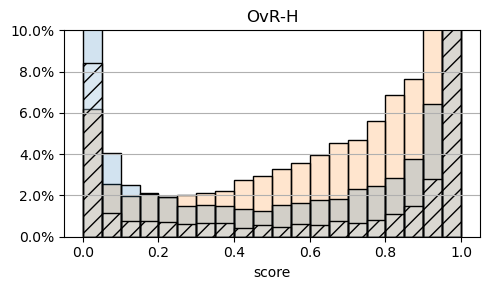

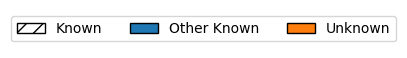

In [41]:
start, stop, step = 0, 1, 0.05
colors=('white',CMAP_t10[0],CMAP_t10[2],CMAP_t10[1])
alpha = [0.2]*len(colors)
bins = np.arange(start=start,stop=stop+step, step=step)
title = ['SM','OvR','OvR-C','OvR-F','OvR-H']
legend = evals.plot_score_dist(data_info, bins, colors=list(zip(colors,alpha)), results_root=ROOT, title = title,
                               figsize=(5,3), ylim=(0,10), plot_neg=False)

# Composing separate legend plot
labels = ['Known', 'Other Known', 'Negative', 'Unknown']
legend_elements = [Patch(facecolor=colors[0], label=labels[0], edgecolor='black', hatch='//'),
                  Patch(facecolor=colors[1], label=labels[1], edgecolor='black'),
                #   Patch(facecolor=colors[2], label=labels[2], edgecolor='black'),
                  Patch(facecolor=colors[3], label=labels[3], edgecolor='black'),]
# Create the figure
fig, ax = plt.subplots(figsize=(5,0.5))
ax.legend(handles=legend_elements, loc='center', ncol=4)
ax.axes.axis("off")
plt.show()

### Protocol 2

In [42]:
data_info = [sm_data_info[1],
             ovr_data_info['base'][1],
             ovr_data_info['C'][1], ovr_data_info['F'][1], ovr_data_info['H'][1]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['largescale_2', 'ResNet_50_neg_0', 'SoftMax']
['largescale_2', 'ResNet_50_neg_0', 'OvR']
['largescale_2', 'ResNet_50_C_neg_0_g', 'OvR']
['largescale_2', 'ResNet_50_F_neg_0_1', 'OvR']
['largescale_2', 'ResNet_50_H_neg_0_02', 'OvR']


[20.73333333  3.53333333  2.53333333  1.86666667] [50.86666667  3.73333333  2.6         1.93333333]
[19.13333333  4.33333333  2.46666667  2.8       ] [44.6         8.4         5.46666667  4.73333333]
[3.33333333 1.33333333 0.86666667 1.        ] [4.         1.46666667 1.13333333 1.86666667]


[15.86666667  4.4         2.66666667  2.46666667] [36.6         7.73333333  6.8         5.73333333]
[6.73333333 3.73333333 2.66666667 2.46666667] [13.93333333  5.6         2.73333333  2.66666667]


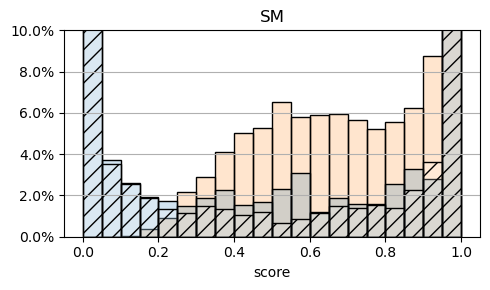

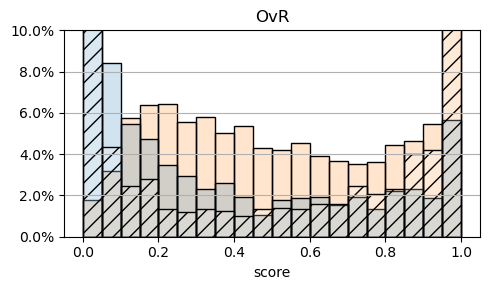

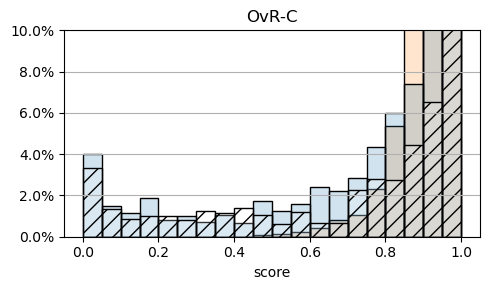

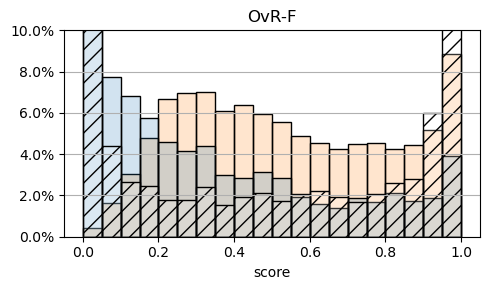

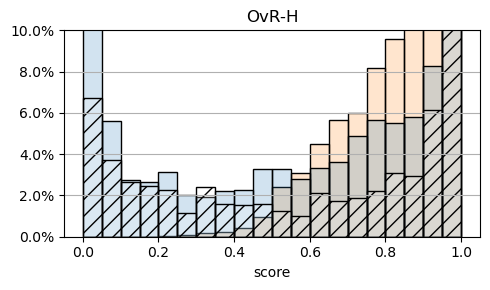

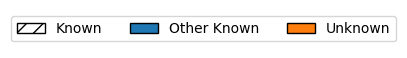

In [43]:
start, stop, step = 0, 1, 0.05
colors=('white',CMAP_t10[0],CMAP_t10[2],CMAP_t10[1])
alpha = [0.2]*len(colors)
bins = np.arange(start=start,stop=stop+step, step=step)
title = ['SM','OvR','OvR-C','OvR-F','OvR-H']
legend = evals.plot_score_dist(data_info, bins, colors=list(zip(colors,alpha)), results_root=ROOT, title = title,
                               figsize=(5,3), ylim=(0,10), plot_neg=False)

# Composing separate legend plot
labels = ['Known', 'Other Known', 'Negative', 'Unknown']
legend_elements = [Patch(facecolor=colors[0], label=labels[0], edgecolor='black', hatch='//'),
                  Patch(facecolor=colors[1], label=labels[1], edgecolor='black'),
                #   Patch(facecolor=colors[2], label=labels[2], edgecolor='black'),
                  Patch(facecolor=colors[3], label=labels[3], edgecolor='black'),]
# Create the figure
fig, ax = plt.subplots(figsize=(5,0.5))
ax.legend(handles=legend_elements, loc='center', ncol=4)
ax.axes.axis("off")
plt.show()

In [44]:
data_info = [eos_data_info[1],
             ovr_data_info_neg['base'][1],
             ovr_data_info_neg['C'][1], ovr_data_info_neg['F'][1], ovr_data_info_neg['H'][1]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['largescale_2', 'ResNet_50_neg_All', 'EOS']
['largescale_2', 'ResNet_50_neg_All', 'OvR']
['largescale_2', 'ResNet_50_C_neg_All_b', 'OvR']
['largescale_2', 'ResNet_50_F_neg_All_3', 'OvR']
['largescale_2', 'ResNet_50_H_neg_All_02', 'OvR']


[21.73333333  6.          4.2         2.66666667] [48.46666667 13.26666667  5.46666667  4.06666667]
[34.13333333  3.46666667  1.66666667  1.86666667] [67.73333333  5.93333333  3.06666667  1.66666667]
[12.13333333  2.46666667  1.33333333  1.6       ] [19.73333333  5.13333333  3.6         2.53333333]


[4.8        6.66666667 5.66666667 5.2       ] [ 6.53333333 12.66666667 12.4        10.93333333]
[18.86666667  2.46666667  1.73333333  1.53333333] [45.73333333  6.6         4.06666667  2.86666667]


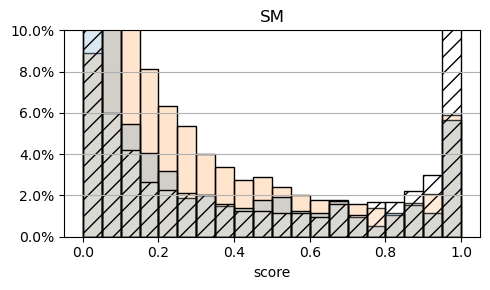

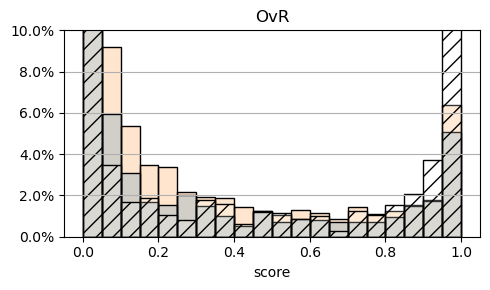

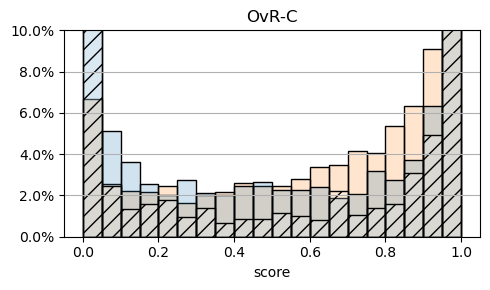

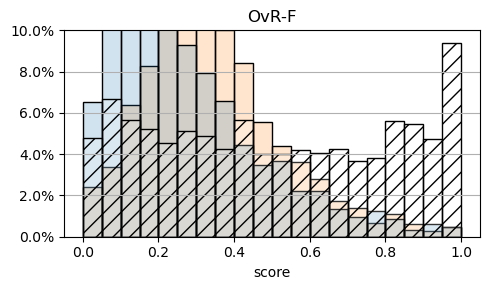

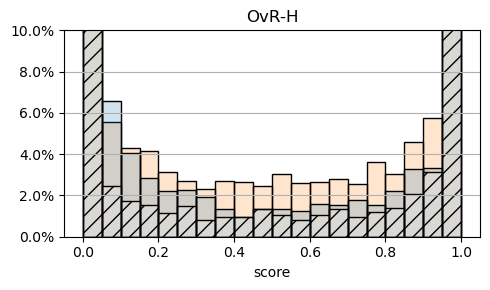

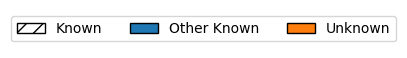

In [45]:
start, stop, step = 0, 1, 0.05
colors=('white',CMAP_t10[0],CMAP_t10[2],CMAP_t10[1])
alpha = [0.2]*len(colors)
bins = np.arange(start=start,stop=stop+step, step=step)
title = ['SM','OvR','OvR-C','OvR-F','OvR-H']
legend = evals.plot_score_dist(data_info, bins, colors=list(zip(colors,alpha)), results_root=ROOT, title = title,
                               figsize=(5,3), ylim=(0,10), plot_neg=False)

# Composing separate legend plot
labels = ['Known', 'Other Known', 'Negative', 'Unknown']
legend_elements = [Patch(facecolor=colors[0], label=labels[0], edgecolor='black', hatch='//'),
                  Patch(facecolor=colors[1], label=labels[1], edgecolor='black'),
                #   Patch(facecolor=colors[2], label=labels[2], edgecolor='black'),
                  Patch(facecolor=colors[3], label=labels[3], edgecolor='black'),]
# Create the figure
fig, ax = plt.subplots(figsize=(5,0.5))
ax.legend(handles=legend_elements, loc='center', ncol=4)
ax.axes.axis("off")
plt.show()

### Protocol 3

In [46]:
data_info = [sm_data_info[2],
             ovr_data_info['base'][2],
             ovr_data_info['C'][2], ovr_data_info['F'][2], ovr_data_info['H'][2]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['largescale_3', 'ResNet_50_neg_0', 'SoftMax']
['largescale_3', 'ResNet_50_neg_0', 'OvR']
['largescale_3', 'ResNet_50_C_neg_0_g', 'OvR']
['largescale_3', 'ResNet_50_F_neg_0_1', 'OvR']
['largescale_3', 'ResNet_50_H_neg_0_02', 'OvR']


[16.50331126  1.36423841  0.95364238  0.91390728] [69.41721854  2.18543046  1.66887417  1.05960265]
[20.71523179  1.82781457  1.08609272  0.63576159] [71.82781457  4.31788079  2.43708609  1.8807947 ]
[0.63576159 0.25165563 0.25165563 0.37086093] [2.17218543 0.67549669 0.58278146 0.35761589]
[14.84768212  2.90066225  2.          1.60264901] [57.8410596   8.90066225  4.84768212  3.86754967]
[3.16556291 0.94039735 0.79470199 0.76821192] [14.33112583  2.80794702  2.02649007  1.7615894 ]


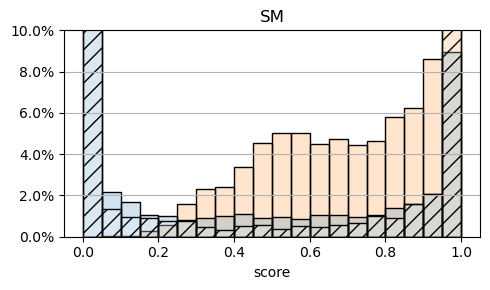

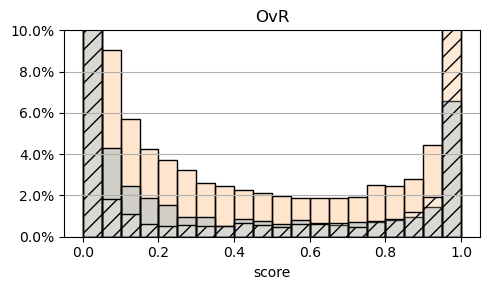

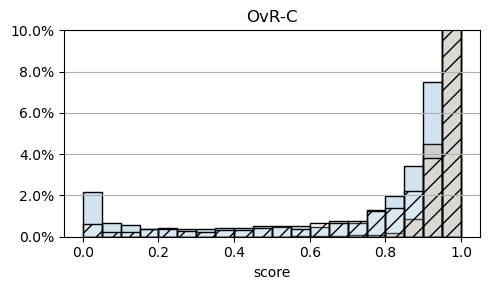

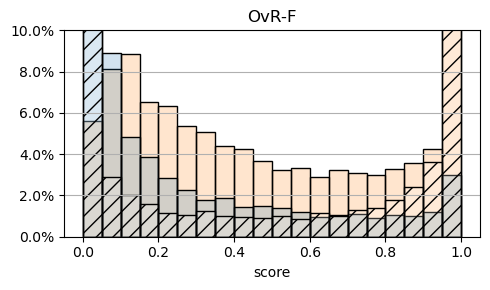

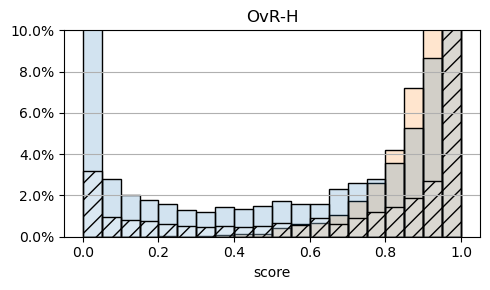

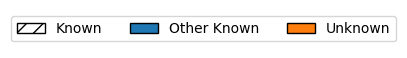

In [47]:
start, stop, step = 0, 1, 0.05
colors=('white',CMAP_t10[0],CMAP_t10[2],CMAP_t10[1])
alpha = [0.2]*len(colors)
bins = np.arange(start=start,stop=stop+step, step=step)
title = ['SM','OvR','OvR-C','OvR-F','OvR-H']
legend = evals.plot_score_dist(data_info, bins, colors=list(zip(colors,alpha)), results_root=ROOT, title = title,
                               figsize=(5,3), ylim=(0,10), plot_neg=False)

# Composing separate legend plot
labels = ['Known', 'Other Known', 'Negative', 'Unknown']
legend_elements = [Patch(facecolor=colors[0], label=labels[0], edgecolor='black', hatch='//'),
                  Patch(facecolor=colors[1], label=labels[1], edgecolor='black'),
                #   Patch(facecolor=colors[2], label=labels[2], edgecolor='black'),
                  Patch(facecolor=colors[3], label=labels[3], edgecolor='black'),]
# Create the figure
fig, ax = plt.subplots(figsize=(5,0.5))
ax.legend(handles=legend_elements, loc='center', ncol=4)
ax.axes.axis("off")
plt.show()

In [48]:
data_info = [eos_data_info[2],
             ovr_data_info_neg['base'][2],
             ovr_data_info_neg['C'][2], ovr_data_info_neg['F'][2], ovr_data_info_neg['H'][2]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['largescale_3', 'ResNet_50_neg_All', 'EOS']
['largescale_3', 'ResNet_50_neg_All', 'OvR']
['largescale_3', 'ResNet_50_C_neg_All_b', 'OvR']
['largescale_3', 'ResNet_50_F_neg_All_3', 'OvR']
['largescale_3', 'ResNet_50_H_neg_All_02', 'OvR']


[20.2781457   3.54966887  1.93377483  1.64238411] [71.36423841  6.05298013  3.15231788  2.17218543]


[27.33774834  2.21192053  1.52317881  0.98013245] [80.91390728  3.8807947   1.69536424  1.31125828]
[4.84768212 1.13907285 0.80794702 0.74172185] [15.82781457  2.35761589  1.90728477  1.21854305]
[4.87417219 4.63576159 3.82781457 3.74834437] [18.0397351  14.62251656 12.37086093 10.99337748]
[7.7218543  1.39072848 0.96688742 0.66225166] [38.63576159  4.76821192  3.08609272  2.43708609]


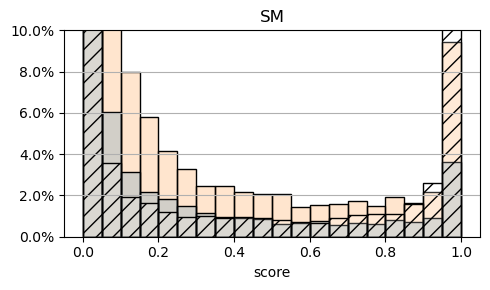

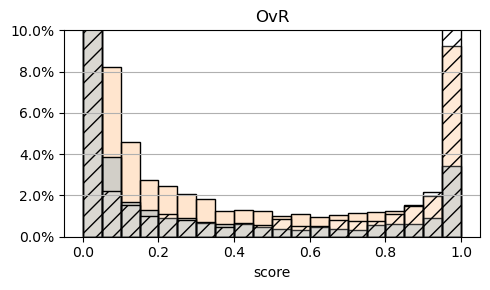

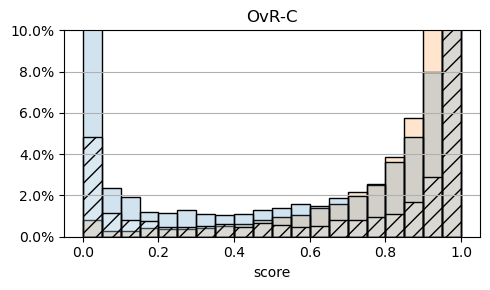

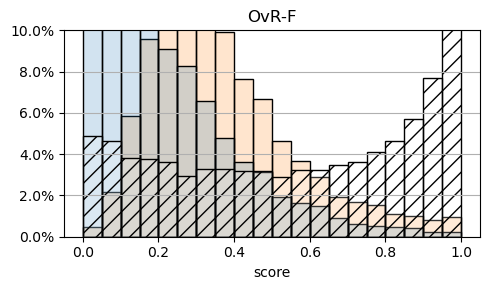

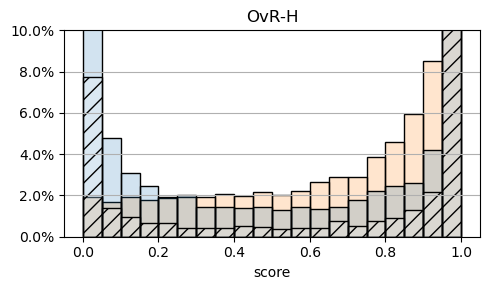

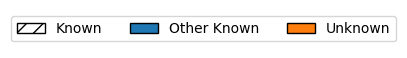

In [49]:
start, stop, step = 0, 1, 0.05
colors=('white',CMAP_t10[0],CMAP_t10[2],CMAP_t10[1])
alpha = [0.2]*len(colors)
bins = np.arange(start=start,stop=stop+step, step=step)
title = ['SM','OvR','OvR-C','OvR-F','OvR-H']
legend = evals.plot_score_dist(data_info, bins, colors=list(zip(colors,alpha)), results_root=ROOT, title = title,
                               figsize=(5,3), ylim=(0,10), plot_neg=False)

# Composing separate legend plot
labels = ['Known', 'Other Known', 'Negative', 'Unknown']
legend_elements = [Patch(facecolor=colors[0], label=labels[0], edgecolor='black', hatch='//'),
                  Patch(facecolor=colors[1], label=labels[1], edgecolor='black'),
                #   Patch(facecolor=colors[2], label=labels[2], edgecolor='black'),
                  Patch(facecolor=colors[3], label=labels[3], edgecolor='black'),]
# Create the figure
fig, ax = plt.subplots(figsize=(5,0.5))
ax.legend(handles=legend_elements, loc='center', ncol=4)
ax.axes.axis("off")
plt.show()

## Table data

### Protocol 1

In [50]:
data_info = [sm_data_info[0],
             ovr_data_info['base'][0],
             ovr_data_info['C'][0], ovr_data_info['F'][0], ovr_data_info['H'][0]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['largescale_1', 'ResNet_50_neg_0', 'SoftMax']
['largescale_1', 'ResNet_50_neg_0', 'OvR']
['largescale_1', 'ResNet_50_C_neg_0_g', 'OvR']
['largescale_1', 'ResNet_50_F_neg_0_1', 'OvR']
['largescale_1', 'ResNet_50_H_neg_0_02', 'OvR']


In [53]:
results = evals.print_metrics(data_info, results_root=ROOT)

maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓
0.6236	0.7623	3.4966	0.0252	0.0619	0.0366
0.6613	0.7916	3.4603	0.0181	0.0365	0.0212


0.5945	0.7651	0.7293	0.4528	1.0722	2.5112
0.6226	0.7526	3.8586	0.0208	0.0404	0.0272
0.6351	0.8021	1.2603	0.1491	0.3671	0.3660


In [54]:
data_info = [eos_data_info[0],
             ovr_data_info_neg['base'][0],
             ovr_data_info_neg['C'][0], ovr_data_info_neg['F'][0], ovr_data_info_neg['H'][0]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['largescale_1', 'ResNet_50_neg_All', 'EOS']
['largescale_1', 'ResNet_50_neg_All', 'OvR']
['largescale_1', 'ResNet_50_C_neg_All_b', 'OvR']
['largescale_1', 'ResNet_50_F_neg_All_3', 'OvR']
['largescale_1', 'ResNet_50_H_neg_All_02', 'OvR']


In [56]:
results = evals.print_metrics(data_info, results_root=ROOT)

maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓
0.7835	0.8184	3.4103	0.0219	0.0014	0.0071
0.7758	0.7947	3.7431	0.0151	0.0014	0.0105
0.7247	0.7634	1.0586	0.2683	0.0775	0.8137
0.7489	0.7682	3.9759	0.0206	0.0029	0.0211
0.7815	0.8152	1.4759	0.0926	0.0151	0.1609


### Protocol 2

In [57]:
data_info = [sm_data_info[1],
             ovr_data_info['base'][1],
             ovr_data_info['C'][1], ovr_data_info['F'][1], ovr_data_info['H'][1]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['largescale_2', 'ResNet_50_neg_0', 'SoftMax']
['largescale_2', 'ResNet_50_neg_0', 'OvR']
['largescale_2', 'ResNet_50_C_neg_0_g', 'OvR']
['largescale_2', 'ResNet_50_F_neg_0_1', 'OvR']
['largescale_2', 'ResNet_50_H_neg_0_02', 'OvR']


In [58]:
results = evals.print_metrics(data_info, results_root=ROOT)

maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓
0.6223	0.7273	3.6200	0.1046	0.2890	0.2641


0.6364	0.7259	3.6200	0.0814	0.2245	0.1910
0.6007	0.7066	1.3200	0.7586	1.2402	1.4962
0.6377	0.7362	3.7000	0.0772	0.2189	0.1915
0.6020	0.7033	2.6133	0.3140	0.6323	0.6160


In [59]:
data_info = [eos_data_info[1],
             ovr_data_info_neg['base'][1],
             ovr_data_info_neg['C'][1], ovr_data_info_neg['F'][1], ovr_data_info_neg['H'][1]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['largescale_2', 'ResNet_50_neg_All', 'EOS']
['largescale_2', 'ResNet_50_neg_All', 'OvR']
['largescale_2', 'ResNet_50_C_neg_All_b', 'OvR']
['largescale_2', 'ResNet_50_F_neg_All_3', 'OvR']
['largescale_2', 'ResNet_50_H_neg_All_02', 'OvR']


In [60]:
results = evals.print_metrics(data_info, results_root=ROOT)

maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓


0.7433	0.7527	4.5133	0.0586	0.0234	0.0720
0.7325	0.7478	4.8200	0.0506	0.0194	0.0615
0.7056	0.7231	2.4067	0.2761	0.1822	0.4539
0.7256	0.7395	5.0800	0.0490	0.0200	0.0615
0.7367	0.7468	3.1200	0.1264	0.0815	0.2200


### Protocol 3

In [61]:
data_info = [sm_data_info[2],
             ovr_data_info['base'][2],
             ovr_data_info['C'][2], ovr_data_info['F'][2], ovr_data_info['H'][2]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['largescale_3', 'ResNet_50_neg_0', 'SoftMax']
['largescale_3', 'ResNet_50_neg_0', 'OvR']
['largescale_3', 'ResNet_50_C_neg_0_g', 'OvR']
['largescale_3', 'ResNet_50_F_neg_0_1', 'OvR']
['largescale_3', 'ResNet_50_H_neg_0_02', 'OvR']


In [62]:
results = evals.print_metrics(data_info, results_root=ROOT)

maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓


0.6531	0.7266	2.3099	0.0133	0.0605	0.0562
0.6623	0.7314	2.7656	0.0097	0.0398	0.0339
0.5473	0.6342	0.3470	0.4583	0.7053	0.9398
0.6687	0.7367	2.7642	0.0090	0.0373	0.0310
0.6284	0.7114	0.8848	0.1126	0.2327	0.2551


In [63]:
data_info = [eos_data_info[2],
             ovr_data_info_neg['base'][2],
             ovr_data_info_neg['C'][2], ovr_data_info_neg['F'][2], ovr_data_info_neg['H'][2]]

for idx in range(len(data_info)):
    print(data_info[idx]['info'])

['largescale_3', 'ResNet_50_neg_All', 'EOS']
['largescale_3', 'ResNet_50_neg_All', 'OvR']
['largescale_3', 'ResNet_50_C_neg_All_b', 'OvR']
['largescale_3', 'ResNet_50_F_neg_All_3', 'OvR']
['largescale_3', 'ResNet_50_H_neg_All_02', 'OvR']


In [64]:
results = evals.print_metrics(data_info, results_root=ROOT)

maxOSA_N↑	maxOSA_U↑	FNRx10↓	FPRx10(NT)↓	FPRx10(N)↓	FPRx10(U)↓


0.7502	0.7420	3.3364	0.0067	0.0082	0.0166
0.7335	0.7343	3.6397	0.0056	0.0080	0.0144
0.6793	0.6935	1.0702	0.1269	0.1457	0.2529
0.7281	0.7334	3.6623	0.0059	0.0082	0.0145
0.7522	0.7471	1.3682	0.0392	0.0520	0.0971
